In [1]:
"""
https://www.cryptocompare.com
jan.allema@gmail.com
PW: jancrypto


https://www.cryptocompare.com/coins/guides/how-to-use-our-api/
https://min-api.cryptocompare.com/documentation
"""

'\nhttps://www.cryptocompare.com\njan.allema@gmail.com\nPW: jancrypto\n\n\nhttps://www.cryptocompare.com/coins/guides/how-to-use-our-api/\nhttps://min-api.cryptocompare.com/documentation\n'

In [2]:
"""
"
API
jancrypto

price poll current and historical
"
"""""

'\n"\nAPI\njancrypto\n\nprice poll current and historical\n"\n'

In [99]:
import cryptocompare
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from copy import deepcopy

In [5]:
mycrypto = ['BTC', 'ETH', 'MIOTA', 'ADA', 'XLM', 'LINK']

In [7]:
cryptocompare.cryptocompare._set_api_key_parameter('7868ca59e38dde44d5b44e64a0a1a576c059693dfbfe2a7a08a5a2dc5da31957')

AttributeError: module 'cryptocompare.cryptocompare' has no attribute '_set_api_key_parameter'

In [118]:
all_coins_dates = []
all_coins_dates.append(['date'] + mycrypto)
for date in np.arange(datetime.datetime(2021, 4,10), datetime.datetime.now().date(), datetime.timedelta(days=1), dtype = 'datetime64[D]'):
    all_coins = []
    all_coins.append(date)
    for coin in mycrypto:
        price = cryptocompare.get_historical_price(coin = coin, curr = 'USD', timestamp = pd.Timestamp(date))
        all_coins.append(price[coin]['USD'])
    print(date)
    all_coins_dates.append(all_coins)

[ERROR] You are over your rate limit please upgrade your account!


TypeError: 'NoneType' object is not subscriptable

In [116]:
df_hist = pd.DataFrame(all_coins_dates[1:],columns = all_coins_dates[0])

In [117]:
df_hist_0 = deepcopy(df_hist)

In [94]:
df_february21_april21 = pd.concat([df_hist_0,
                                 df_hist_1,
                                 df_hist_2,
                                 df_hist_3,
                                 df_hist_4,
                                 df_hist_5,
                                 df_hist_6]).reset_index(drop = True)

In [95]:
df_february21_.to_csv('./data/feb21_.csv')

In [96]:
import os

In [97]:
df_hist_all = pd.DataFrame()

for fname in os.listdir('./data/'):
    df = pd.read_csv('./data/' + fname, index_col=0)
    df_hist_all = pd.concat([df_hist_all,df]).reset_index(drop = True)
df_hist_all['date'] = pd.to_datetime(df_hist_all.date)

df_hist_all = df_hist_all.sort_values(by = 'date').drop_duplicates(subset = 'date')
df_hist_all

,date,BTC,ETH,MIOTA,ADA,XLM,LINK
202,2019-01-01,3747.39,133.14,0.3606,0.04082,0.1097,0.2906
203,2019-01-02,3880.15,141.90,0.3753,0.04245,0.1157,0.3043
204,2019-01-03,3961.01,156.10,0.4013,0.04539,0.1195,0.3192
205,2019-01-04,3835.86,149.10,0.3866,0.04234,0.1132,0.3706
206,2019-01-05,3874.06,156.04,0.3829,0.04389,0.1152,0.4449
...,...,...,...,...,...,...,...
197,2021-02-14,47222.32,1817.48,1.3110,0.91370,0.5654,34.2500
198,2021-02-15,48652.87,1802.96,1.1840,0.84500,0.5163,33.1900
199,2021-02-16,47936.51,1779.40,1.2680,0.86050,0.4948,32.5800
200,2021-02-17,49184.63,1782.83,1.2620,0.87120,0.4856,32.0100


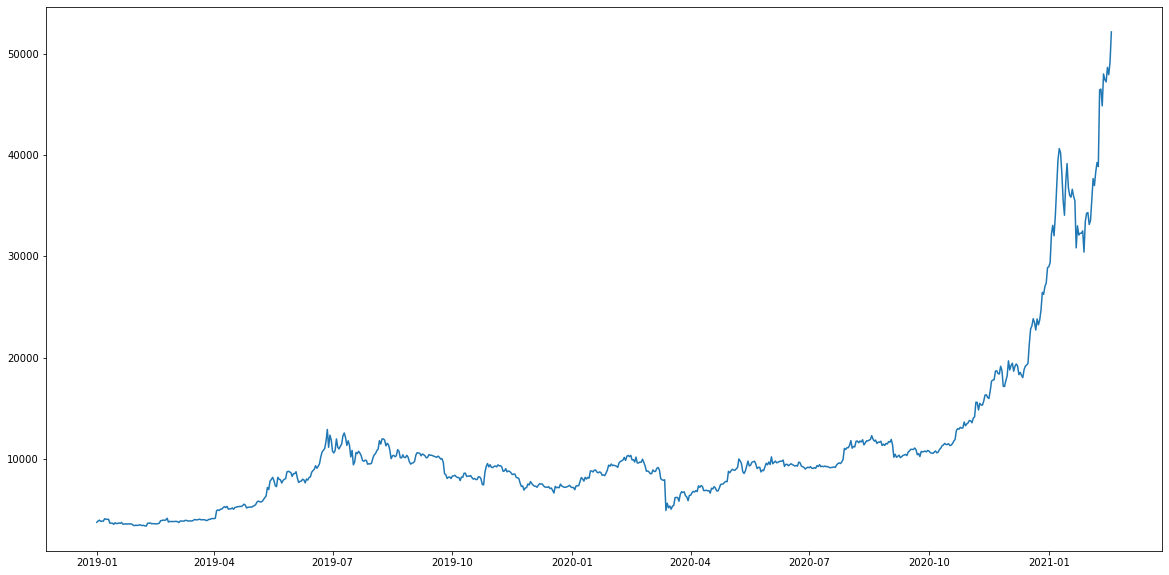

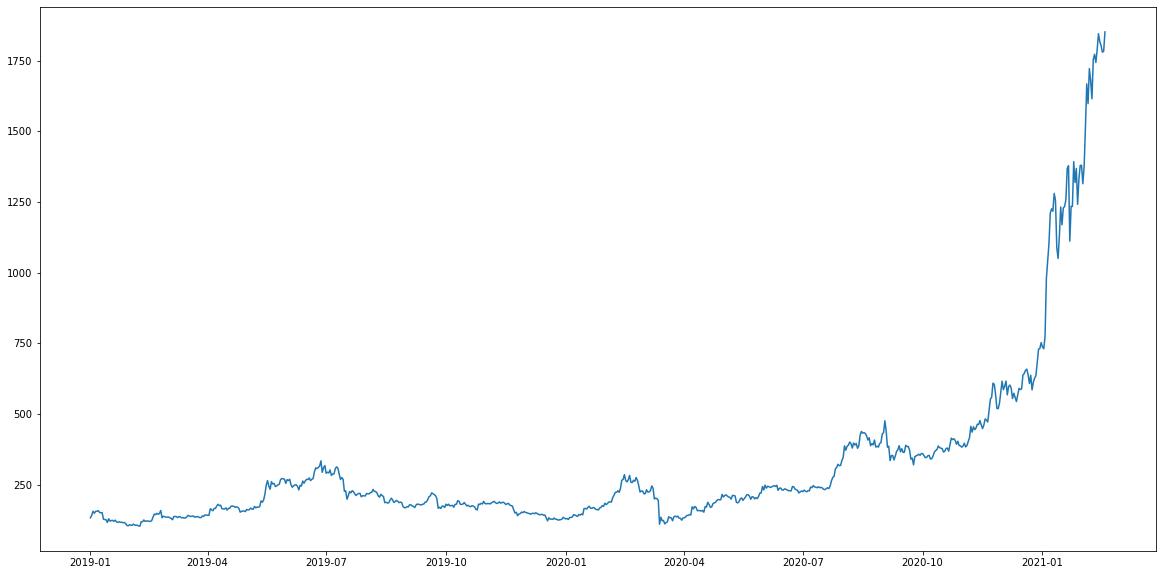

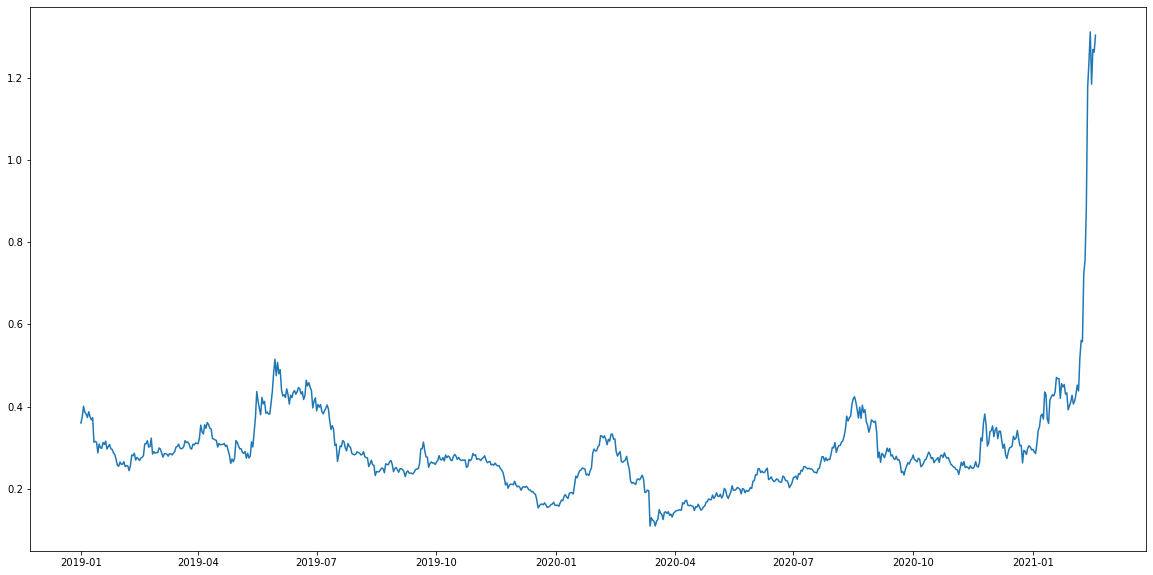

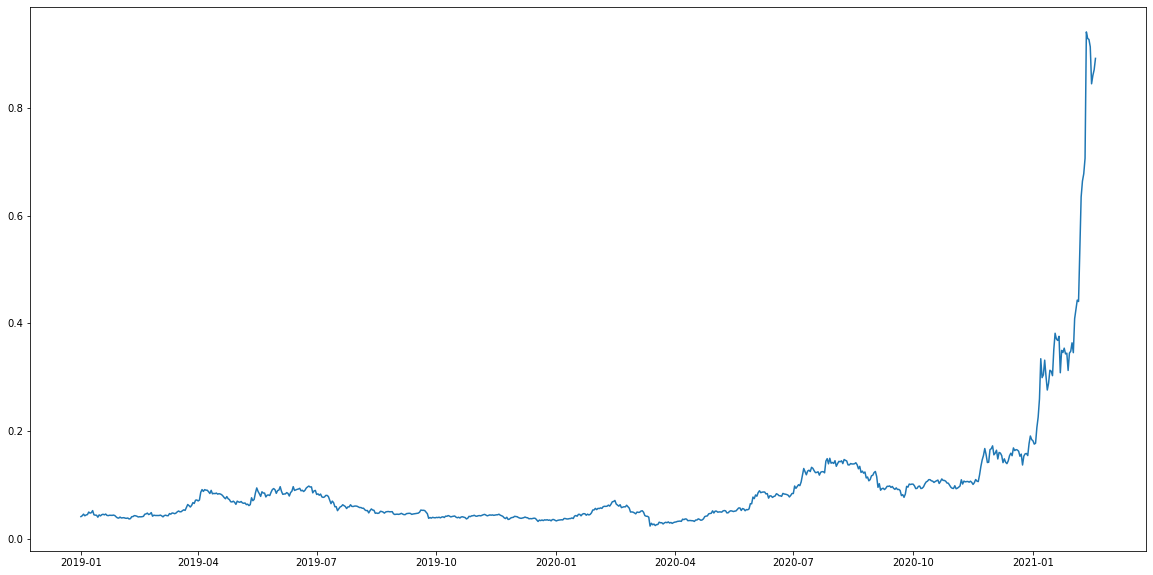

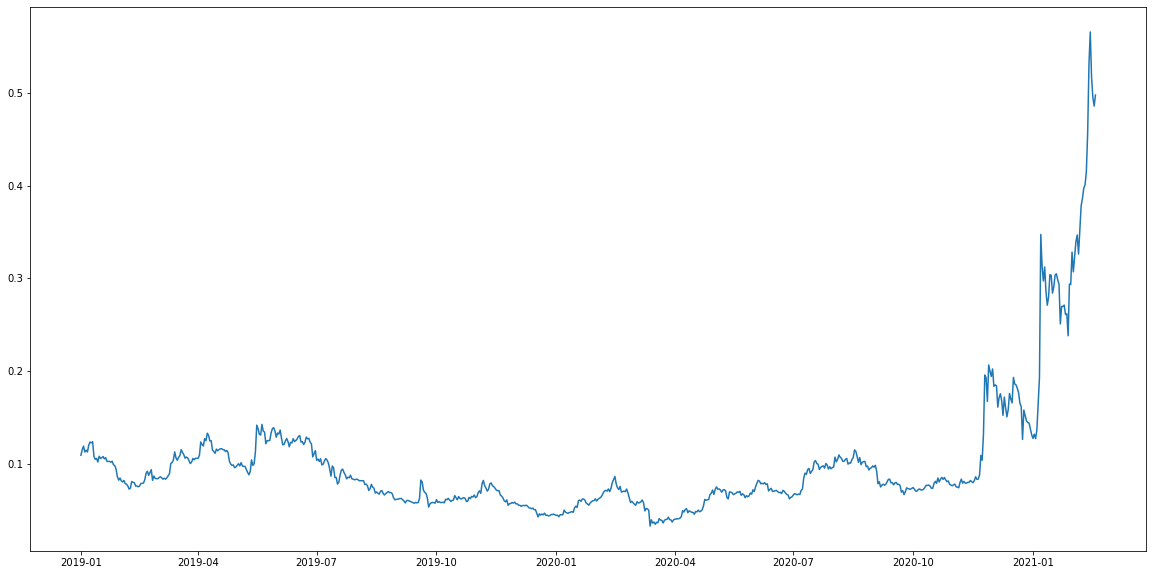

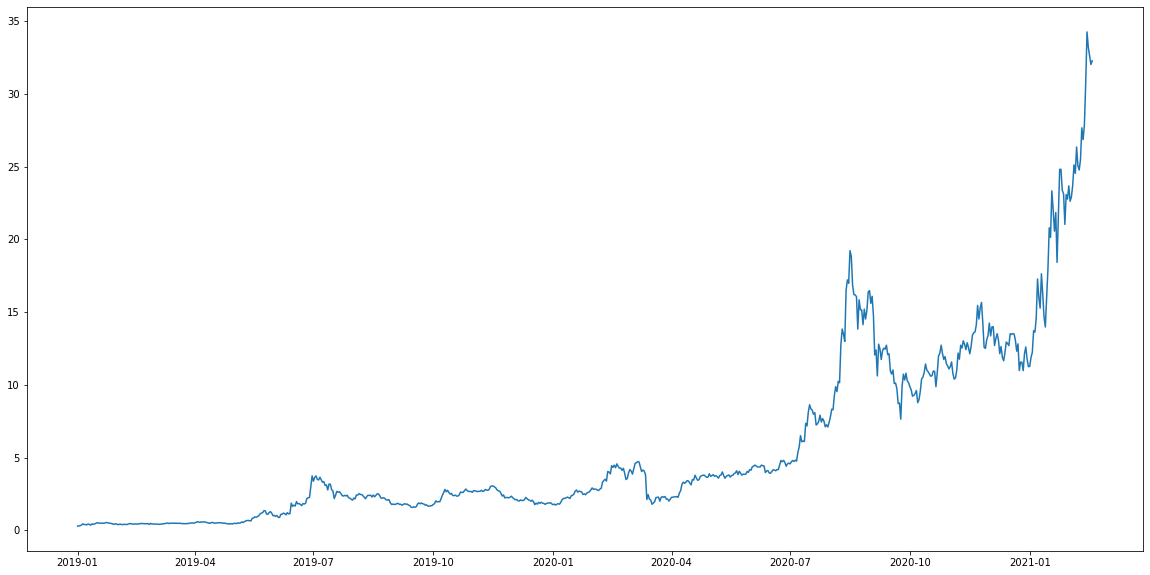

In [111]:
for col in df_hist_all.columns[1:]:
    plt.figure(figsize = (20,10))
    plt.plot(df_hist_all['date'], df_hist_all[col])

### Load my portfolio

In [14]:
#myportfolio = pd.read_excel('C:\\Users\\janallemann\\OneDrive\\Dokumente\\crypto_portfolio.xlsx', skiprows = 16, nrows = 7, header = 0)\
 #               .iloc[:,[0,9]]\
  #              .rename(columns = {'Unnamed: 0': 'currency',
   #                               'Unnamed: 9': 'amount'})

myportfolio = pd.read_excel('C:\\Users\\janal\\OneDrive\\Dokumente\\crypto_portfolio.xlsx', skiprows = 16, nrows = 7, header = 0)\
                .iloc[:,[0,9]]\
                .rename(columns = {'Unnamed: 0': 'currency',
                                  'Unnamed: 9': 'amount'})

myportfolio['current_price'] = 0.0
myportfolio['previous_price'] = 0.0
myportfolio.set_index('currency', inplace = True)
days_previous = 1

for coin in mycrypto:
    
    prev_day = datetime.datetime.now() - datetime.timedelta(days=days_previous)
    
    price = cryptocompare.get_price(coin, 'USD')[coin]['USD']
    myportfolio.current_price[coin] = price
    
    prev_price = cryptocompare.get_historical_price(coin = coin, currency = 'USD', timestamp = pd.Timestamp(prev_day))[coin]['USD']
    myportfolio.previous_price[coin] = prev_price
    

myportfolio['current_value'] = myportfolio.amount*myportfolio.current_price
tot_current = myportfolio.current_value.sum()

myportfolio['previous_value'] = myportfolio.amount*myportfolio.previous_price
tot_previous = myportfolio.previous_value.sum()

myportfolio['diff'] = myportfolio.current_value - myportfolio.previous_value

print('portfolio worth is {:.2f} USD ({:.2f}% in {} day(s))'.format(tot_current,
                                            (tot_current-tot_previous)/tot_current*100,
                                                                   days_previous))
myportfolio

[ERROR] You are over your rate limit please upgrade your account!


TypeError: 'NoneType' object is not subscriptable

In [ ]:
"""
"
Invests:
07.01.2021: 7'000 CHF
26.02.2021: 10'000 CHF
26.04.2021: 10'000 CHF
"
"""

In [233]:
mytrades = pd.DataFrame(columns = ['date', 'CHF', 'USD'] + mycrypto)
mytrades['date'] = np.arange(datetime.datetime(2019, 1, 1), datetime.datetime.now().date(), datetime.timedelta(days=1), dtype = 'datetime64[D]')
mytrades.set_index('date', inplace = True)

mytrades.loc['2021-01-07','BTC'] = 7000

mytrades = mytrades.fillna(method = 'ffill').fillna(0.0)

mytrades

,CHF,USD,BTC,ETH,MIOTA,ADA,XLM,LINK
date,,,,,,,,
2019-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-02,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
2019-01-03,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
2019-01-04,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0
2019-01-05,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2021-09-10,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0
2021-09-11,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0
2021-09-12,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0


In [9]:
cryptocompare.get_price('BTC', 'ETH')

{'BTC': {'ETH': 13.72}}

,BTC,ETH,MIOTA,ADA,XLM,LINK
date,,,,,,
2019-01-01,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-02,0.1,0.0,0.0,0.0,0.0,0.0
2019-01-03,0.1,0.0,0.0,0.0,0.0,0.0
2019-01-04,0.2,0.0,0.0,0.0,0.0,0.0
2019-01-05,0.2,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2021-09-10,0.2,0.0,0.0,0.0,0.0,0.0
2021-09-11,0.2,0.0,0.0,0.0,0.0,0.0
2021-09-12,0.2,0.0,0.0,0.0,0.0,0.0
